# Regression - Experimenting with additional models (Regresión - Experimentación con modelos adicionales)

In the previous notebook, we used simple regression models to look at the relationship between features of a bike rentals dataset. In this notebook, we'll experiment with more complex models to improve our regression performance.

En el cuaderno anterior, usamos modelos de regresión simples para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar nuestro rendimiento de regresión.

Let's start by loading the bicycle sharing data as a **Pandas** DataFrame and viewing the first few rows. We'll also split our data into training and test datasets.

Comencemos cargando los datos de bicicletas compartidas como un **Pandas** DataFrame y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. 

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

## Experiment with Algorithms

The linear regression algorithm we used last time to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

El algoritmo de regresión lineal que usamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmos de regresión que podríamos probar, incluidos:

- **Linear algorithms - Algoritmos lineales**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge* (no solo el algoritmo de regresión lineal que usamos anteriormente (que técnicamente es un algoritmo de mínimos cuadrados ordinarios), sino otras variantes como *Lasso* y *Ridge*).

- **Tree-based algorithms - Algoritmos basados en árboles**: Algorithms that build a decision tree to reach a prediction (algoritmos que construyen un árbol de decisiones para llegar a una predicción).

- **Ensemble algorithms - Algoritmos de conjunto**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability (algoritmos que combinan los resultados de varios algoritmos básicos para mejorar la generalización).

> **Note**: For a full list of Scikit-Learn estimators that encapsulate algorithms for supervised machine learning, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html). There are many algorithms to choose from, but for most real-world scenarios, the [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) can help you find a suitable starting point. 

### Try Another Linear Algorithm - Intentando con otro algoritmo lineal

Let's try training our regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code. 

Intentemos entrenar nuestro modelo de regresión usando un algoritmo **Lasso**. Podemos hacer esto simplemente cambiando el estimador en el código de entrenamiento.

Lasso() 

MSE - cuanto menor sea el valor, mejor será el ajuste del modelo: 201155.70593338404
RMSE - Cuanto menor sea el valor, mejor será el modelo: 448.5038527519959
R2 - Cuanto mayor sea el valor, mejor será el ajuste del modelo: 0.6056468637824488


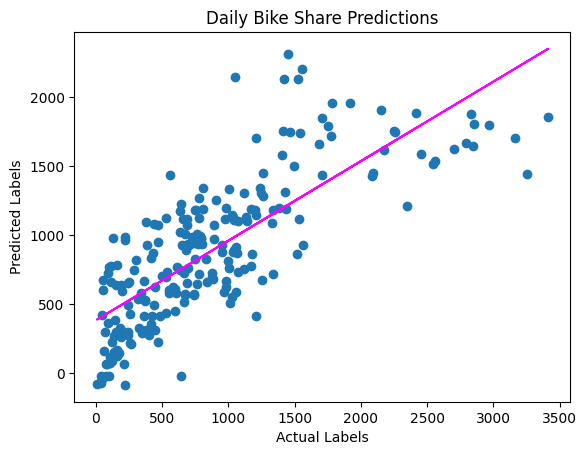

In [3]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE - cuanto menor sea el valor, mejor será el ajuste del modelo:", mse)
rmse = np.sqrt(mse)
print("RMSE - Cuanto menor sea el valor, mejor será el modelo:", rmse)
r2 = r2_score(y_test, predictions)
print("R2 - Cuanto mayor sea el valor, mejor será el ajuste del modelo:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Try a Decision Tree Algorithm (Try a Decision Tree Algorithm)

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da como resultado una *rama* en un *árbol de decisión* basado en en el valor de la característica. Al final de cada serie de ramas hay nodos hoja con el valor de etiqueta predicho en función de los valores de las características.

It's easiest to see how this works with an example. Let's train a Decision Tree regression model using the bike rental data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

Es más fácil ver cómo funciona esto con un ejemplo. Entrenemos un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el siguiente código imprimirá la definición del modelo y una representación de texto del árbol que usa para predecir los valores de las etiquetas.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_7 >  0.28
|   |   |   |   |   |   |   |--- val

So now we have a tree-based model; but is it any good? Let's evaluate it with the test data.

Así que ahora tenemos un modelo basado en árboles; pero es bueno? Vamos a evaluarlo con los datos de prueba.

MSE: 230235.18636363637
RMSE: 479.82828841538344
R2: 0.548638367533058


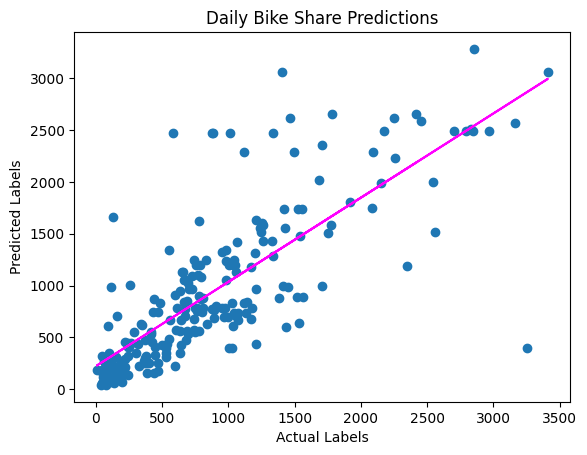

In [5]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The tree-based model doesn't seem to have improved over the linear model, so what else could we try?

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, entonces, ¿qué más podemos probar?

### Try an Ensemble Algorithm - Probando un algoritmo de conjunto

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a *bagging*) or by building a sequence of models that build on one another to improve predictive performance (referred to as *boosting*).

Los algoritmos de conjunto funcionan mediante la combinación de múltiples estimadores base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces denominada *embolsado bagging*) o construyendo una secuencia de modelos que se complementan entre sí para mejorar el rendimiento predictivo ( denominado *boosting impulso*).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promedio a varios modelos de árboles de decisión para obtener un mejor modelo general.

RandomForestRegressor() 

MSE: 112621.22548090911
RMSE: 335.5908602463856
R2: 0.7792131559630309


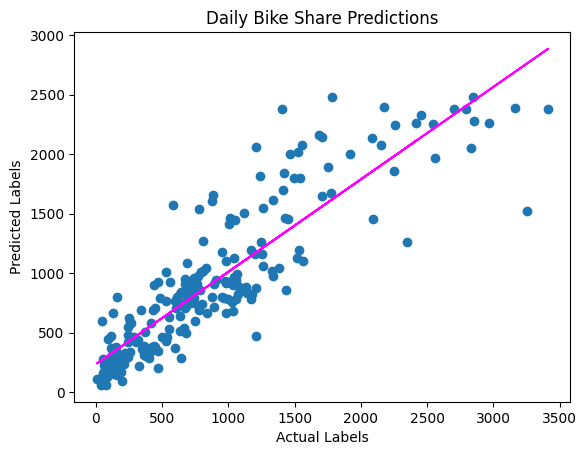

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a *boosting* ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the *loss* (error) in the model.

Por si acaso, probemos también un algoritmo de conjunto *potenciador*. Usaremos un estimador de Gradient Boosting, que como un algoritmo Random Forest construye múltiples árboles, pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se construye sobre los resultados del anterior en un intento de reducir gradualmente el pérdida (error) en el modelo.

GradientBoostingRegressor() 

MSE: 103935.99328774589
RMSE: 322.3910564636462
R2: 0.7962400085609175


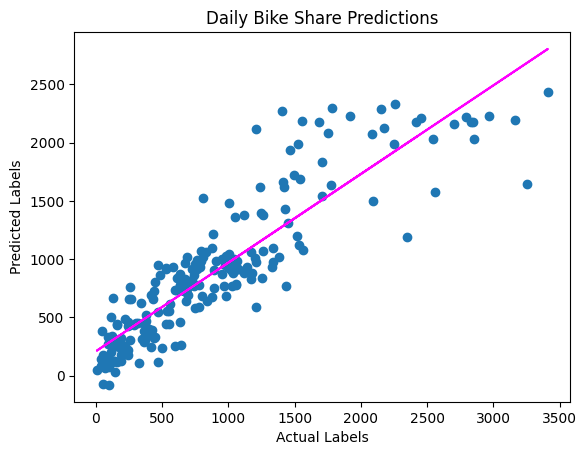

In [7]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Summary

Here we've tried a number of new regression algorithms to improve performance. In our notebook we'll look at 'tuning' these algorithms to improve performance.

Aquí hemos probado una serie de nuevos algoritmos de regresión para mejorar el rendimiento. En nuestro cuaderno, veremos cómo "ajustar" estos algoritmos para mejorar el rendimiento.

## Further Reading
To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).